# Lecture 4: Convolution
### Partly inherited from Francois Lauze

In this notebook, we shall see a number of examples of convolution, applied to images. Note that when using convolution in coding examples, you are allowed to use built-in functions for convolution (but of course not when asked to compute a convolution by hand). We shall use scipy.signal.

We start out by importing the necessary functionality.

In [5]:
# Importing packages
from scipy import signal as sg
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io
from matplotlib import cm
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


**Example 1: A mean filter**
We start out by loading and viewing the image cameraman.png, creating a noisy version of it, and applying various convolution operators to it.

First, read and show the image

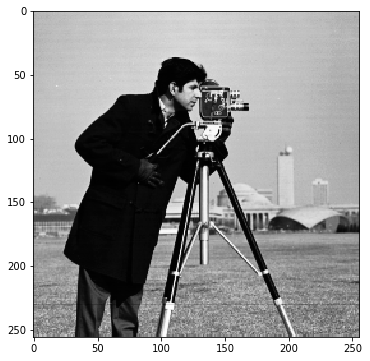

In [6]:
# Read image
f = np.array(io.imread('cameraman.png'))
plt.imshow(f, cmap=cm.Greys_r)

To see convolution in action, let's display 3x3 patches of the original image centered at $x=112$, $y=124$ and $x=186$ and $y=209$ as small pictures and as arrays of values

patch1 = 
 [[ 9  9 10]
 [ 8  8  8]
 [ 9  9  9]]
patch2 = 
 [[ 17 120 142]
 [ 19  63 147]
 [ 28  24 127]]


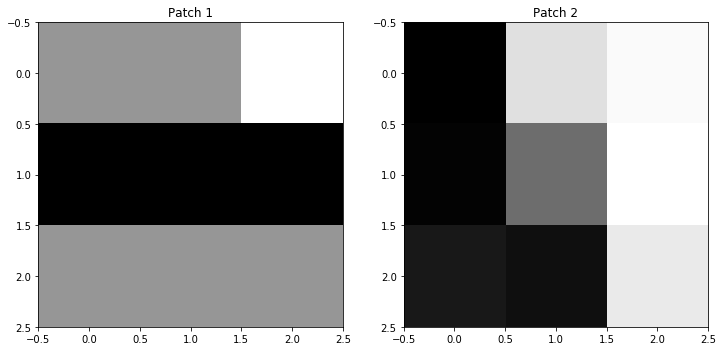

In [7]:
patch1 = f[111:114, 123:126]
patch2 = f[208:211, 185:188]
fig, ax = plt.subplots(1,2)
ax[0].imshow(patch1, interpolation='none', cmap=cm.Greys_r)
ax[1].imshow(patch2, interpolation='none', cmap=cm.Greys_r)
ax[0].set_title('Patch 1')
ax[1].set_title('Patch 2')
print("patch1 = \n", patch1)
print("patch2 = \n", patch2)

Create a probing function (a kernel) $g$ for a mean filter, and use it to perform 3x3 mean filtering for convolution on the original image:

g: [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


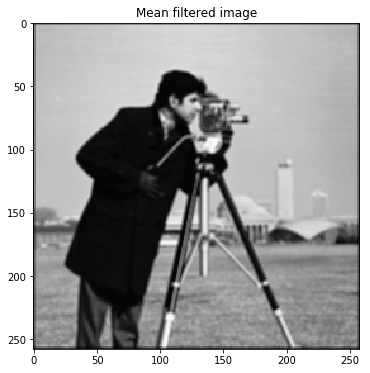

Original dimensions (256, 256)
Convolution result dimensions (258, 258)


In [8]:
# First, make the kernel
g = np.ones((3,3))
g /= g.sum()
print('g:', g)

# Next, use the kernel to perform the convolution
fg = sg.convolve2d(f, g)
plt.imshow(fg, cmap=cm.Greys_r)
plt.title('Mean filtered image')
plt.show()

print("Original dimensions", f.shape)
print("Convolution result dimensions", fg.shape)

Note that $f*g$ is slightly larger than $f$, and with dark boundaries. This because it needed to be extended outside the normal boundaries of $f$ and by default, it sets out of boundary values to 0, i.e. black value (this is zero padding).

Actually, convolve2d can return an image with same size as f, by cropping automatically the result, by passing the argument "mode='same'". We do that here:

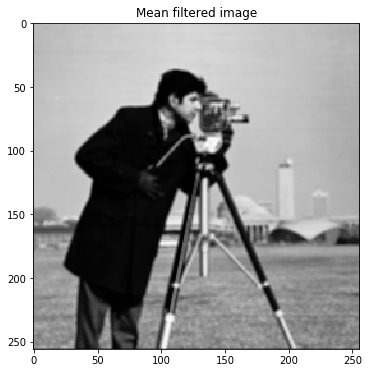

In [9]:
fg = sg.convolve2d(f, g, mode='same')
plt.imshow(fg, cmap=cm.Greys_r)
plt.title('Mean filtered image')
plt.show()

To see in detail what the convolution did, let's look at our patches. Display the 3x3 patches centered at $x=112$, $y=124$ and $x=186$ and $y=209$ as small pictures and as arrays of values for $f*g$

expected value at center pixel (112,124):  8.777777777777779
expected value at center pixel (209,186):  76.33333333333333
patches after convolution:
patchc1 = 
 [[ 8.55555556  8.77777778  9.33333333]
 [ 8.44444444  8.77777778  9.55555556]
 [ 8.55555556  8.66666667 11.11111111]]
patchc2 = 
 [[ 55.          93.88888889 130.33333333]
 [ 39.77777778  76.33333333 112.66666667]
 [ 28.44444444  60.22222222  92.88888889]]


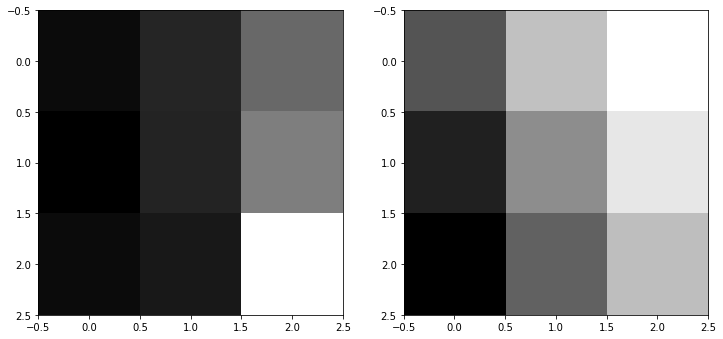

In [10]:
patchc1 = fg[111:114, 123:126]
patchc2 = fg[208:211, 185:188]
fig, ax = plt.subplots(1,2)
ax[0].imshow(patchc1, interpolation='none', cmap=cm.Greys_r)
ax[1].imshow(patchc2, interpolation='none', cmap=cm.Greys_r)
# check box convolution as local averaging
print("expected value at center pixel (112,124): ", (g*patch1).sum())
print("expected value at center pixel (209,186): " ,(g*patch2).sum())
print("patches after convolution:")
print("patchc1 = \n", patchc1)
print("patchc2 = \n", patchc2)

**Example 2:** Effect of mean filter on noisy image
Now we generate a noisy version of the cameraman image, and apply the mean filter.

Text(0.5,1,'The convolved image with a 5x5 filter')

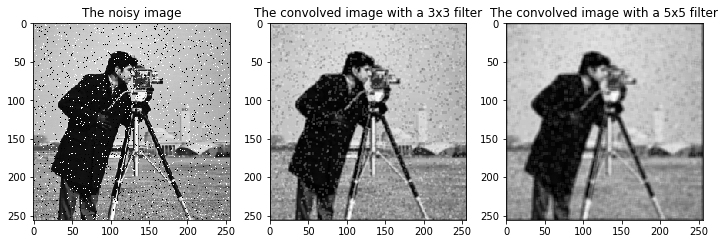

In [11]:
# First, we add noise to the cameraman image
f_n = skimage.util.random_noise(f, mode='s&p')

# Next, we apply the mean filter by convolving the image with the kernel g
f_nc = sg.convolve2d(f_n, g, mode='same')

fig, ax = plt.subplots(1,3)
ax[0].imshow(f_n, cmap=cm.Greys_r)
ax[0].set_title('The noisy image')
ax[1].imshow(f_nc, cmap=cm.Greys_r)
ax[1].set_title('The convolved image with a 3x3 filter')

g5 = np.ones((5,5))
g5 /= g5.sum()
f_nc5 = sg.convolve2d(f_n, g5, mode='same')
ax[2].imshow(f_nc5, cmap=cm.Greys_r)
ax[2].set_title('The convolved image with a 5x5 filter')

Another way to visualize the effect of convolution is by plotting the image grayscale values as a 2D surface.

That is, we plot as a 2D surface, the graphs of the image functions for $f$ and $f * g$,

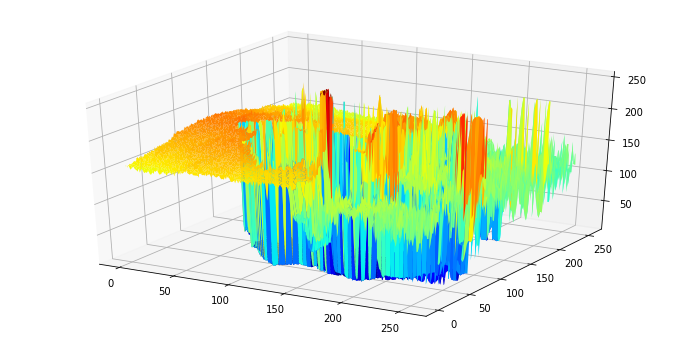

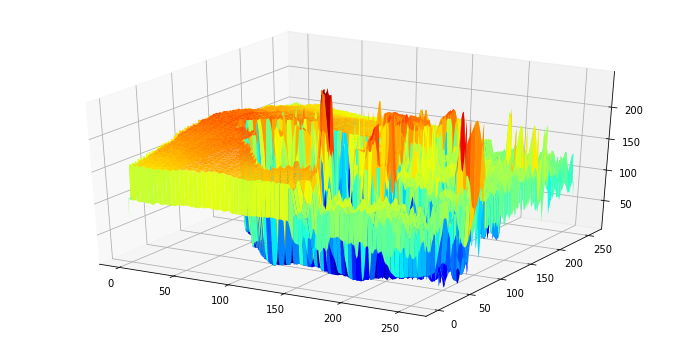

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
m, n = f.shape
M, N = fg.shape
X, Y = np.mgrid[0:m, 0:n]
ax1 = fig.add_subplot(111, projection='3d')
fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
ax1.plot_surface(X,Y, f, rstride=4, cstride=4, cmap=cm.jet)
ax2.plot_surface(X,Y, fg, rstride=4, cstride=4, cmap=cm.jet)
ax[0].set_title('The original image')
ax[1].set_title('The convolved image')
plt.show()

Now I do the same with a 9x9 box filter

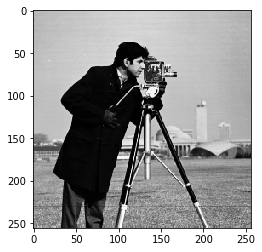

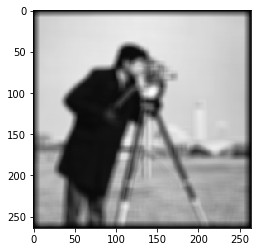

the shape of the f is  (256, 256)
the shape of the convolution f*g is  (264, 264)


In [9]:
g = np.ones((9,9))
g /= g.sum() # normalization 
fg = sg.convolve2d(f, g)
plt.imshow(f, cmap=cm.Greys_r)
plt.show()
plt.imshow(fg, cmap=cm.Greys_r)
plt.show()
print("the shape of the f is ", f.shape)
print("the shape of the convolution f*g is ", fg.shape)

We note that the image is more blurry, but with some ringing effect. We will see that Gaussian filters avoid this artifact.

We also look at the shapes of $f$ and $f*g$ as 3D surfaces, and we can observe that the regularity is much more pronounced.
First we use the same trick as before to avoid that the image becomes larger.

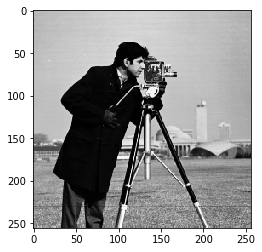

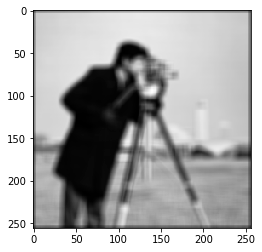

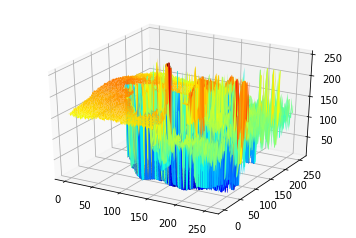

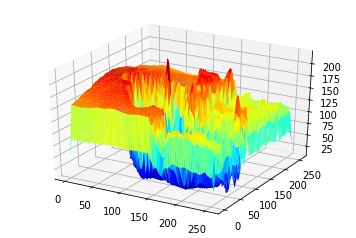

In [10]:
fg = sg.convolve2d(f, g, mode='same')
plt.imshow(f, cmap=cm.Greys_r)
plt.show()
plt.imshow(fg, cmap=cm.Greys_r)
plt.show()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
m, n = f.shape
# fg is 2 pixels larger than f, I remove the 1 band over fg
# so as to get the same size
X, Y = np.mgrid[0:m, 0:n]
ax1 = fig.add_subplot(111, projection='3d')
fig = plt.figure()
ax2 = fig.add_subplot(111, projection='3d')
ax1.plot_surface(X,Y, f, rstride=4, cstride=4, cmap=cm.jet)
ax2.plot_surface(X,Y, fg, rstride=4, cstride=4, cmap=cm.jet)
plt.show()

### Example 3: Convolution and finite differences

As discussed previously, we can use convolution as a means to compute finite difference approximations of partial derivatives.

Dx: [[ 1. -1.]]
Dy: [[-1.]
 [ 1.]]


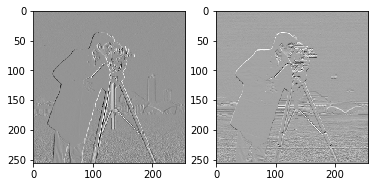

In [11]:
# First, we design the kernels (which was known as g in the lecture)
Dx = np.zeros((1,2)) # the x-dimension in images is the second dimension for arrays.
Dx[0,0] = 1
Dx[0,1] = -1
print('Dx:', Dx)

Dy = np.zeros((2,1))
Dy[0,0] = -1
Dy[1,0] = 1
print('Dy:', Dy)

# Perform the convolutions
Dxf = sg.convolve2d(f, Dx, mode='same')
Dyf = sg.convolve2d(f, Dy, mode='same')

# Visualize the output
fig, ax = plt.subplots(1,2)
ax[0].imshow(Dxf, cmap=cm.Greys_r)
ax[1].imshow(Dyf, cmap=cm.Greys_r)
plt.show()


Let's display the derivative filters as 2D functions / surfaces

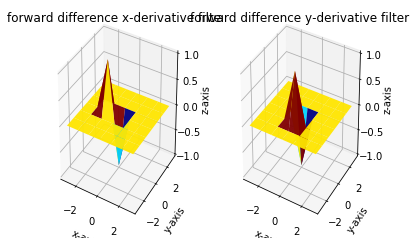

In [12]:
# Create the grid on which they are visualized
x, y = np.mgrid[-3:4, -3:4]
zx = np.zeros(x.shape)
zy = np.zeros(y.shape)

# Set the function values for the partials with respect to x and y, respectively.
# OBS! Here we are making a 3D plot, therefore the x's are indexed into the first coordinate. However, when 
#      we defined the kernel above, we had to index the x's into the second coordinate because arrays are
#      indexed vertically first, from the top left corner.
zx[2,3] = 1
zx[3,3] = -1

zy[3,2] = 1
zy[3,3] = -1

# Plot the two functions
fig = plt.figure()
axx = fig.add_subplot(121, projection='3d')
axy = fig.add_subplot(122, projection='3d')

axx.plot_surface(x, y, zx, cstride=1, rstride=1, cmap=cm.jet, alpha=0.95)
axy.plot_surface(x, y, zy, cstride=1, rstride=1, cmap=cm.jet, alpha=0.95)

axx.set_xlabel('x-axis')
axx.set_ylabel('y-axis')
axx.set_zlabel('z-axis')
axx.set_title('forward difference x-derivative filter')

axy.set_xlabel('x-axis')
axy.set_ylabel('y-axis')
axy.set_zlabel('z-axis')
axy.set_title('forward difference y-derivative filter')

plt.show()

# Gaussian Filter and Derivatives of Gaussian Filter

We can get a smoother smoothing (!) of the image by using *Gaussian smoothing*, and similarly, we can get a smoother approximation of the partial derivatives by using **derivatives of Gaussian** filters.

General form of n-dimensional Gaussian with expectation $\mu \in \mathbb{R}^n$ and variance $\sigma^2$:
   $$
    g({\bf x}) = \frac{1}{\left(2\pi\sigma^2\right)^{\frac{n}2}}e^{-\frac{\|{\bf x}\|^2}{2\sigma^2}},\quad
    \int_{\mathbb{R}^n}g({\bf x}) \,d{\bf x} = 1.
   $$

In the 2D case, we use $x$ and $y$:
  $$
  g({x,y}) = \frac{1}{2\pi\sigma^2}e^{-\frac{\left(x^2+y^2\right)}{2\sigma^2}}
  $$
  
In the discrete case, Gaussians have infinite extent, we need to truncate them, i.e., define them on a finite grid.

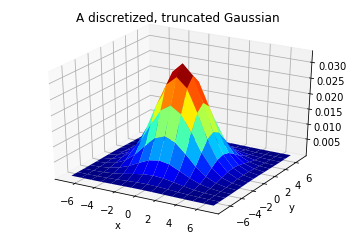

In [13]:
# First, define the grid on which the function is defined
X, Y = np.mgrid[-7:8, -7:8]
# Set the bandwidth and define the function on the grid
sigma = 2.2
g = np.exp(-(X**2 + Y**2)/(2*sigma**2))
g /= g.sum() # to normalized it to sum to 1

# now display the kernel g as a surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, g, cstride=1, rstride=1, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('A discretized, truncated Gaussian')
plt.show()

We convolve the cameraman image with $g$. In our case, it replaces each pixels by the weighted average of a 15x15 window around that pixel, with weights from the Gaussian.

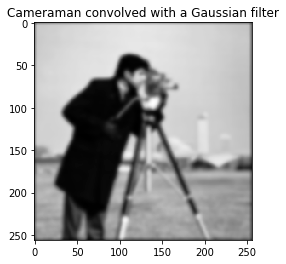

In [14]:
fg = sg.convolve2d(f, g, mode='same')
plt.imshow(fg, cmap=cm.Greys_r)
plt.title('Cameraman convolved with a Gaussian filter')
plt.show()

We try with $\sigma=0.5, 1.0, 2.0, 4.0$

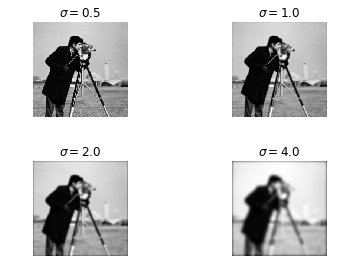

In [15]:
def gaussian(sigma):
    n = int(np.ceil(3*sigma))
    x, y = np.mgrid[-n:n+1, -n:n+1]
    g = np.exp(-(x**2 + y**2)/(2*sigma**2))
    g /= g.sum()
    return g

sigma = [0.5, 1.0, 2.0, 4.0]

fig, ax = plt.subplots(2,2)
ax.shape = ax.size
for i in range(len(sigma)):
    s = sigma[i]
    fg = sg.convolve2d(f, gaussian(s), mode='same')
    ax[i].imshow(fg, cmap=cm.Greys_r)
    ax[i].set_title(r'$\sigma=%.01f$' % s)
    ax[i].axis('off')
    
plt.tight_layout()
plt.show()



We compute the partial derivatives of our Gaussian filter (2D) with respect to $x$ and $y$ 

$$
\frac{\partial g}{\partial x} = -\frac{x}{\sigma^2}\frac{1}{2\pi\sigma^2}e^{-\frac{\left(x^2+y^2\right)}{2\sigma^2}} = -\frac{x}{\sigma^2}g(x,y)
$$
$$
\frac{\partial g}{\partial y} = -\frac{y}{\sigma^2}\frac{1}{2\pi\sigma^2}e^{-\frac{\left(x^2+y^2\right)}{2\sigma^2}} = -\frac{y}{\sigma^2}g(x,y)
$$

Let's visualize them, first as 2D images and next as surfaces.

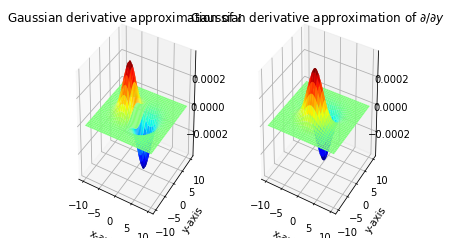

In [16]:
# First, define the grid on which we visualie them
x, y = np.mgrid[-10:10:100j, -10:10:100j]

# Set a bandwidth and define the kernels
sigma = 2.2
g = np.exp(-(x**2+y**2)/(2*sigma**2))
g /= g.sum()
Dgx = -x*g/(sigma**2)
Dgy = -y*g/(sigma**2)

fig = plt.figure()
axx = fig.add_subplot(121, projection='3d')
axy = fig.add_subplot(122, projection='3d')
axx.plot_surface(x, y, Dgx, cstride=3, rstride=3,cmap=cm.jet)
axy.plot_surface(x, y, Dgy, cstride=3, rstride=3,cmap=cm.jet)
axx.set_xlabel('x-axis')
axx.set_ylabel('y-axis')
axy.set_xlabel('x-axis')
axy.set_ylabel('y-axis')
axx.set_title('Gaussian derivative approximation of $\partial/\partial x$')
axy.set_title('Gaussian derivative approximation of $\partial/\partial y$')

plt.show()

Now compare with the finite difference filters above: the derivatives of the Gaussian look like smooth, inverted versions of the finite difference filters.

Next, we compute convolution of the cameraman image with derivative of Gaussian at different $\sigma^2$. Note that for making the convolution, we need to index the kernel into an array, which means columns first, rows second and flipping the columns.

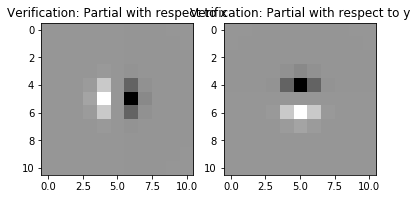

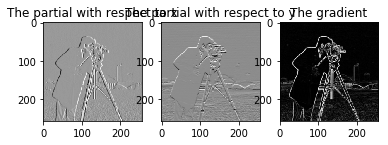

In [17]:
def dergauss(sigma, extent=5):
    # Create x and y derivative of Gaussian approximation with 
    # finite extent. extent should be at least 5, i.e. 2x5+1 = 11
    # squared array, it should also be around 3 sigma, but should not
    # be too large either, maxtextent controls it.
    
    # Define the grid on which the kernel is defined
    x, y = np.mgrid[-extent:extent+1, -extent:extent+1]
    # Define the Gaussian kernel
    g = np.exp(-(x**2+y**2)/(2*sigma**2))
    g /= g.sum()
    Dgx = -y*g/(sigma**2)
    Dgy = np.flipud(-x*g/(sigma**2))
    ### NB! NOTE THAT HERE, x AND y ARE EXCHANGED, BECAUSE ARRAYS ARE INDEXED COLUMNS FIRST, ROWS NEXT.
    ### MOREOVER, THE y AXIS HAS BEEN FLIPPED; THIS IS BECAUSE ARRAYS ARE INDEXED FROM THE TOP LEFT CORNER
    
    # For verification, visualize the implemented kernels as images
    fig, ax = plt.subplots(1,2)               
    im0 = ax[0].imshow(Dgx, cmap=cm.Greys_r)
    im1 = ax[1].imshow(Dgy, cmap=cm.Greys_r)
    ax[0].set_title('Verification: Partial with respect to x')
    ax[1].set_title('Verification: Partial with respect to y')
   
    return Dgx, Dgy

# Compute the partial derivatives and the gradient magnitude
Dgx, Dgy = dergauss(0.7)
fx = sg.convolve2d(f, Dgx, mode='same')
fy = sg.convolve2d(f, Dgy, mode='same')
gradmagf = np.sqrt(fx**2 + fy**2)

# Visualize the three images
fig, ax = plt.subplots(1,3)
ax[0].imshow(fx, cmap=cm.Greys_r)
ax[1].imshow(fy, cmap=cm.Greys_r)
ax[2].imshow(gradmagf, cmap=cm.Greys_r)
ax[0].set_title('The partial with respect to x')
ax[1].set_title('The partial with respect to y')
ax[2].set_title('The gradient')
plt.show()

Now, we repeat the same with a larger bandwidth $\sigma$:

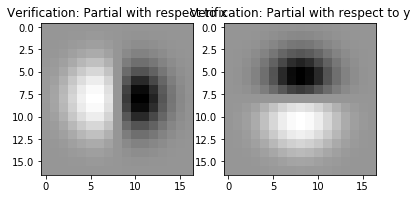

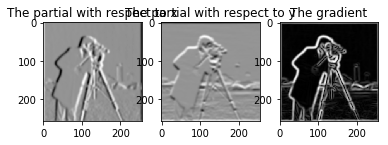

In [18]:
# Compute the partials and the gradient magnitude
Dgx, Dgy = dergauss(2.5, extent=8)
fx = sg.convolve2d(f, Dgx, mode='same')
fy = sg.convolve2d(f, Dgy, mode='same')
gradmagf = np.sqrt(fx**2 + fy**2)

# Visualize the partials and the gradient magnitude
fig, ax = plt.subplots(1,3)
ax[0].imshow(fx, cmap=cm.Greys_r)
ax[1].imshow(fy, cmap=cm.Greys_r)
ax[2].imshow(gradmagf, cmap=cm.Greys_r)
ax[0].set_title('The partial with respect to x')
ax[1].set_title('The partial with respect to y')
ax[2].set_title('The gradient')
plt.show()